In [5]:
# import the Mpipi_frontend object
from finches import Mpipi_frontend, CALVADOS_frontend

# initialize the frontend objects (note can change salt)
mf = Mpipi_frontend()
cf = CALVADOS_frontend()

# laf-1 RGG domain (1-168)
s1 = 'MESNQSNNGGSGNAALNRGGRYVPPHLRGGDGGAAAAASAGGDDRRGGAGGGGYRRGGGNSGGGGGGGYDRGYNDNRDDRDNRGGSGGYGRDRNYEDRGYNGGGGGGGNRGYNNNRGGGGGGYNRQDRGDGGSSNFSRGGYNNRDEGSDNRGSGRSYNNDRRDNGGD'

# laf-1 CTD (622-708)
s2 = 'LEGMSGDMRSGGGYRGRGGRGNGQRFGGRDHRYQGGSGNGGGGNGGGGGFGGGGQRSGGGGGFQSGGGGGRQQQQQQRAQPQQDWWS'

# calculate epsilon
eps = mf.epsilon(s1, s2)
print(eps)
# calculate epsilon
eps = cf.epsilon(s1, s2)
print(eps)


/Users/alex/miniconda3/envs/neuron3_11/lib/python3.11/site-packages/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


-11.832997767002091
-28.8043554142898


(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

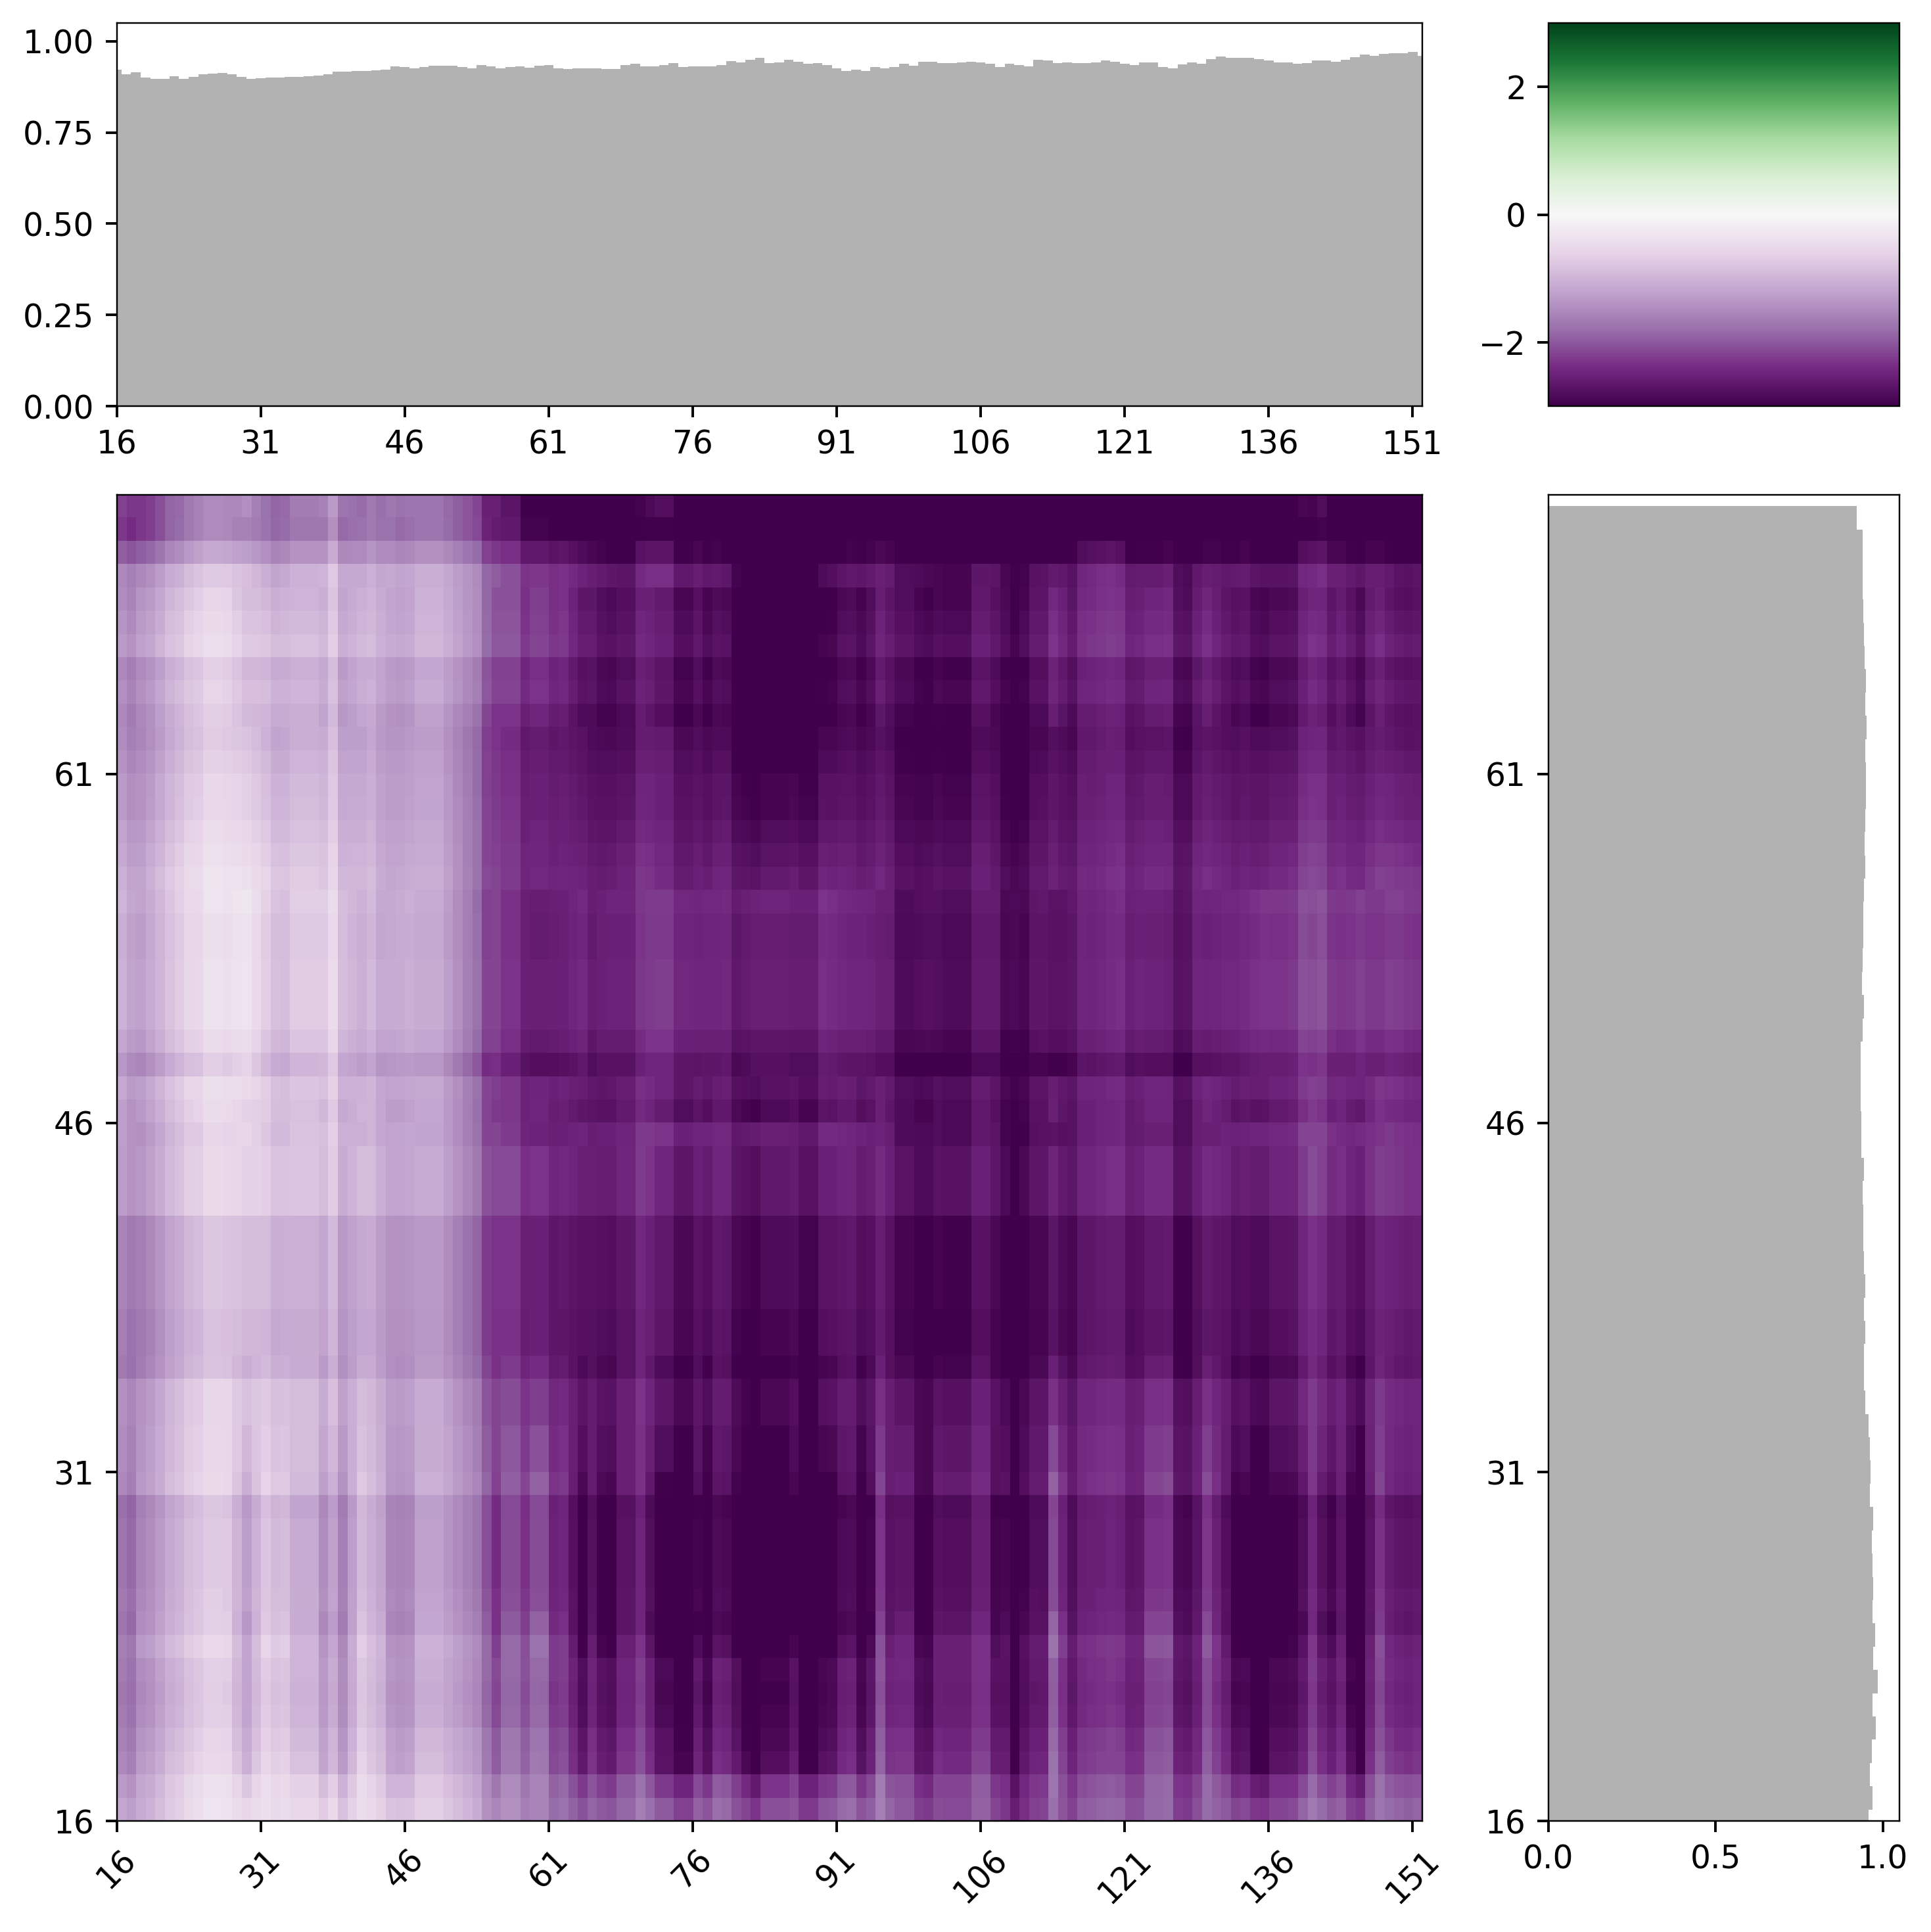

In [47]:
# show basic intermap
mf.interaction_figure(s1,s2, tic_frequency=15)

(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

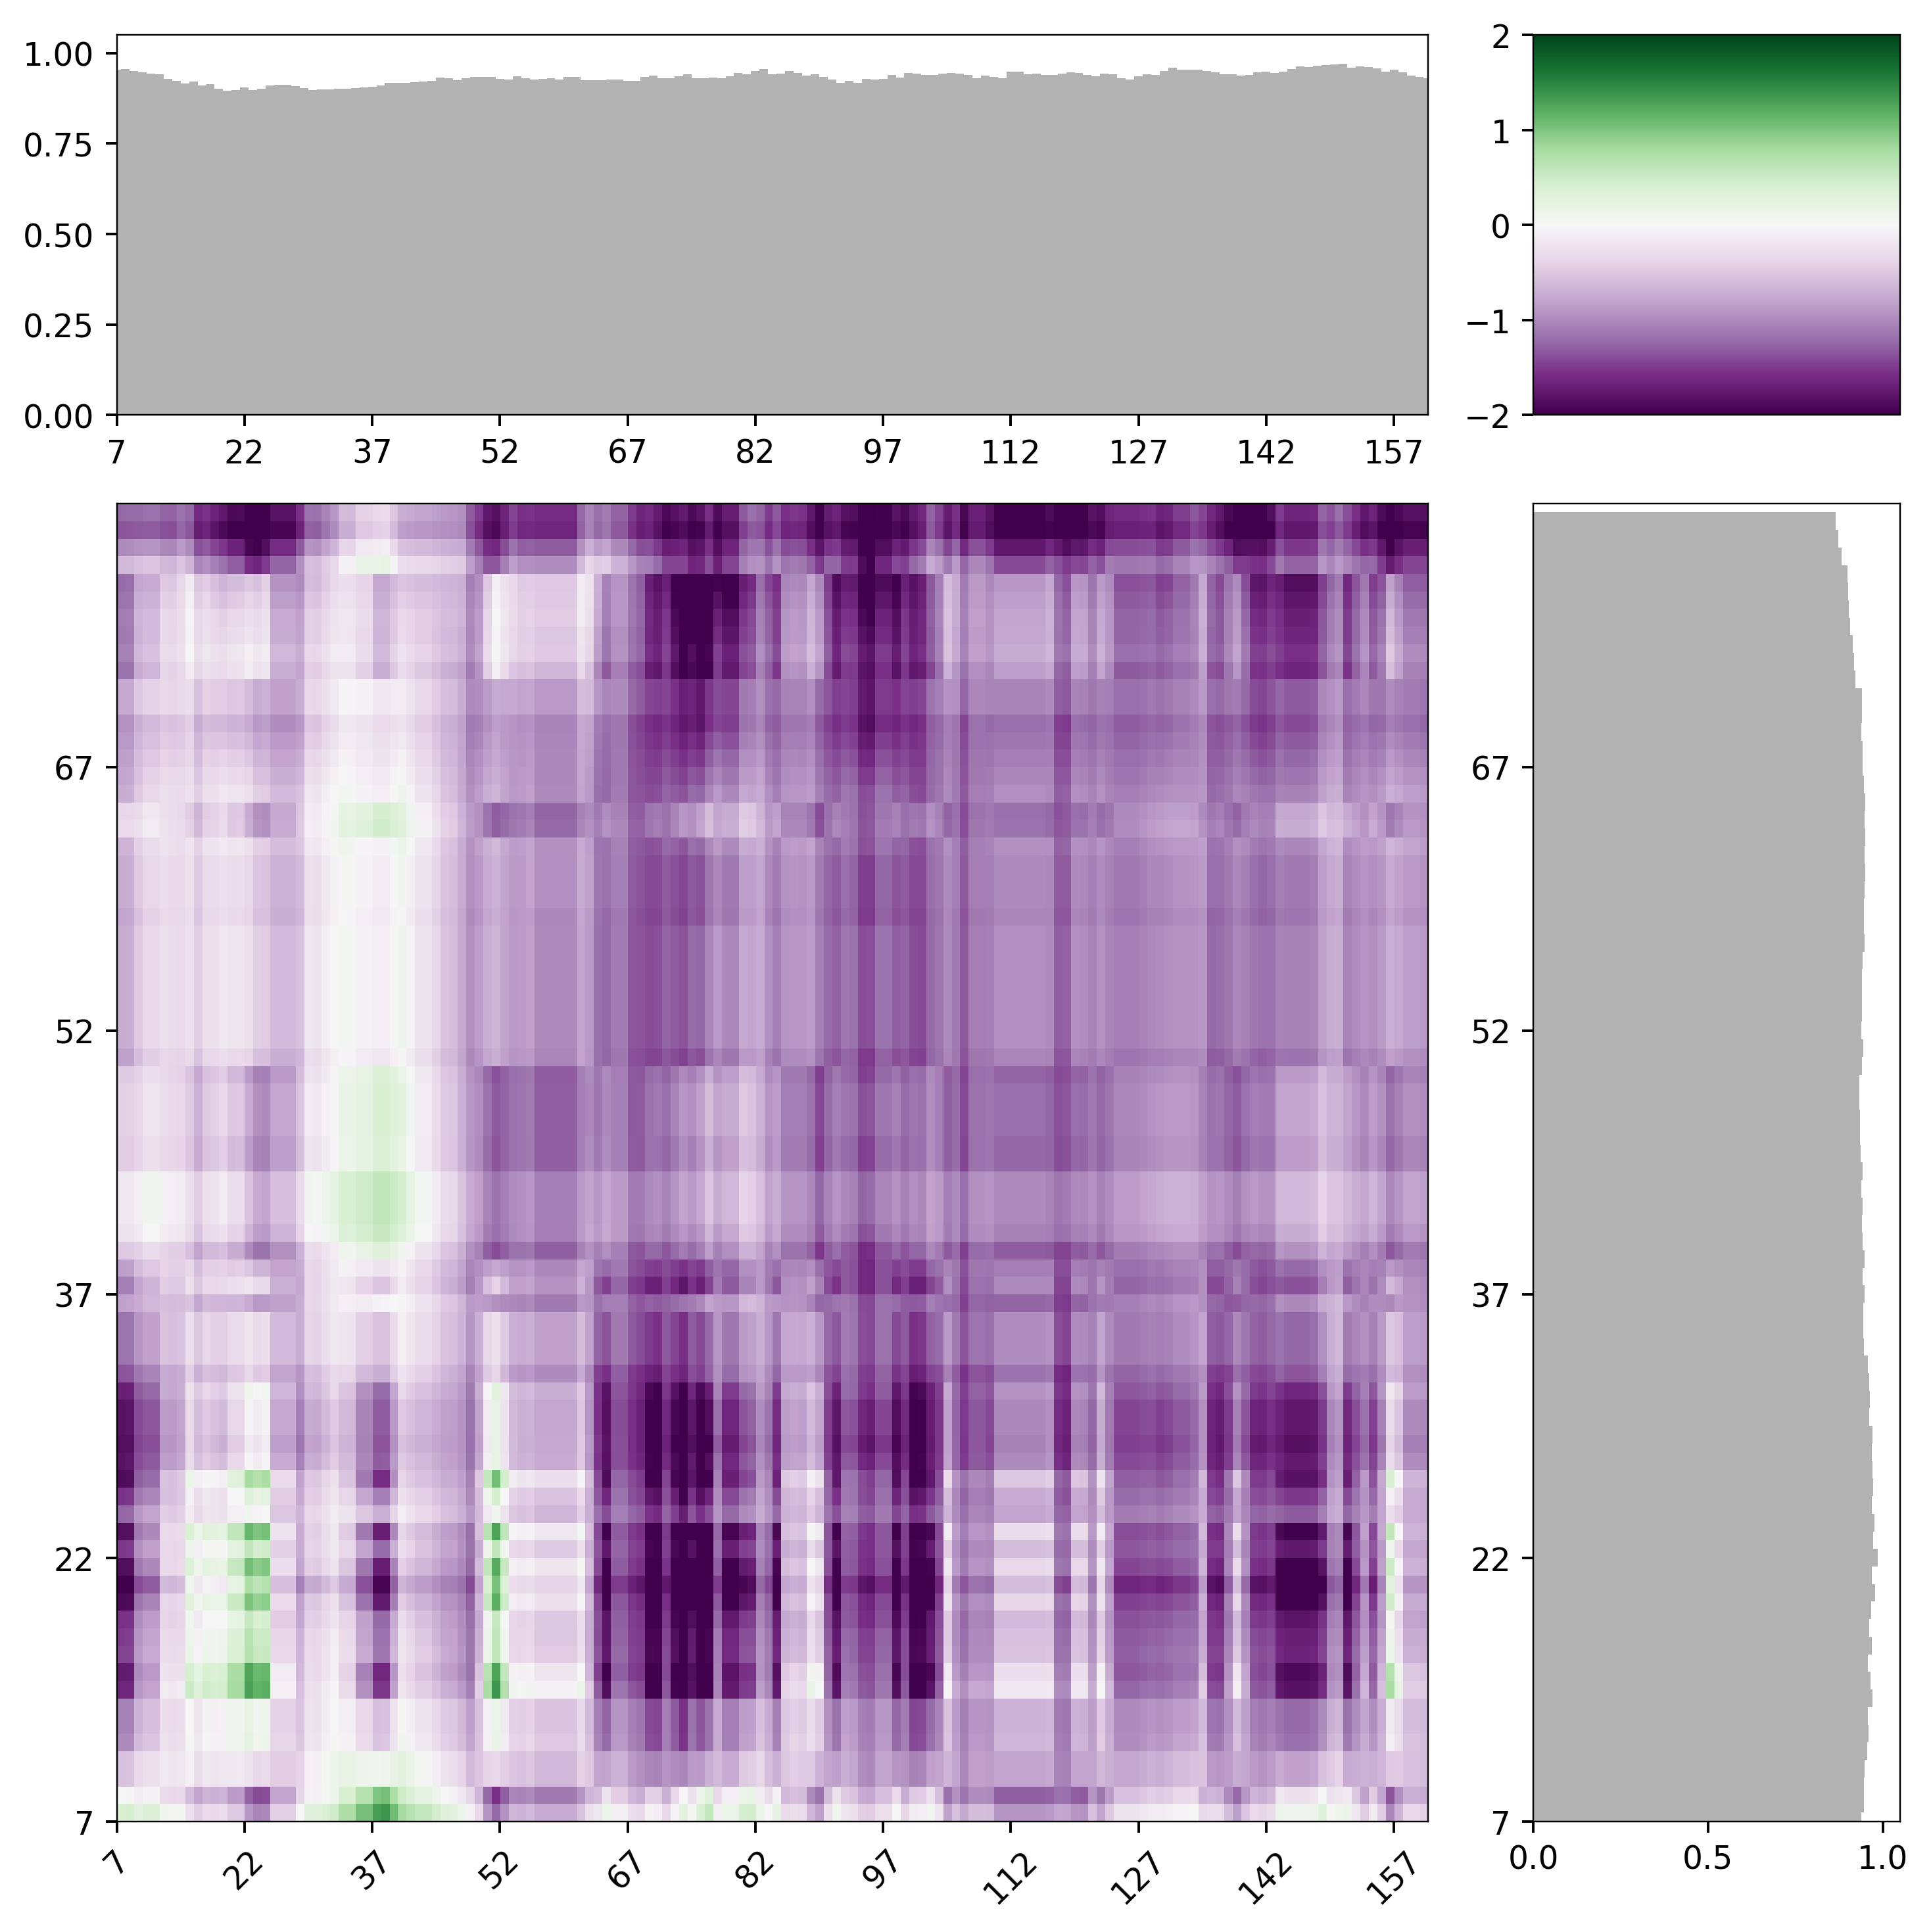

In [48]:
# show intermap with altered window_size
mf.interaction_figure(s1,s2, tic_frequency=15, window_size=13, vmin=-2, vmax=2)

## IDR:FD intermap
The code below shows an example of doing an IDR:folded domain intermap. We will likely build this into the frontendobjects in the future but this has not happened yet...

In [29]:
from finches.utils import folded_domain_utils
from finches import CALVADOS_frontend

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


gcn4_ntd         = 'MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFDKFIKTEEDPIIKQDTPSNLDFDFALPQTATAPDAKTVLPIPELDDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADKAIESTEEVSLVPSNLEVSTTSFLPTPVLEDAKLTQTRKVKKPNSVVKKSHHVGKDDESRLDHLGVVAYNRKQRSIPLSPIVPESSDPAALKRARNT'

cf = CALVADOS_frontend()
FD = folded_domain_utils.FoldeDomain('ADBD1.pdb')


/Users/alex/miniconda3/envs/neuron3_11/lib/python3.11/site-packages/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


In [44]:
# set window size
window_size = 31

# calculate surface:IDR intermap
X = FD.calculate_idr_surface_patch_interactions(gcn4_ntd, mf.IMC_object, window_size)

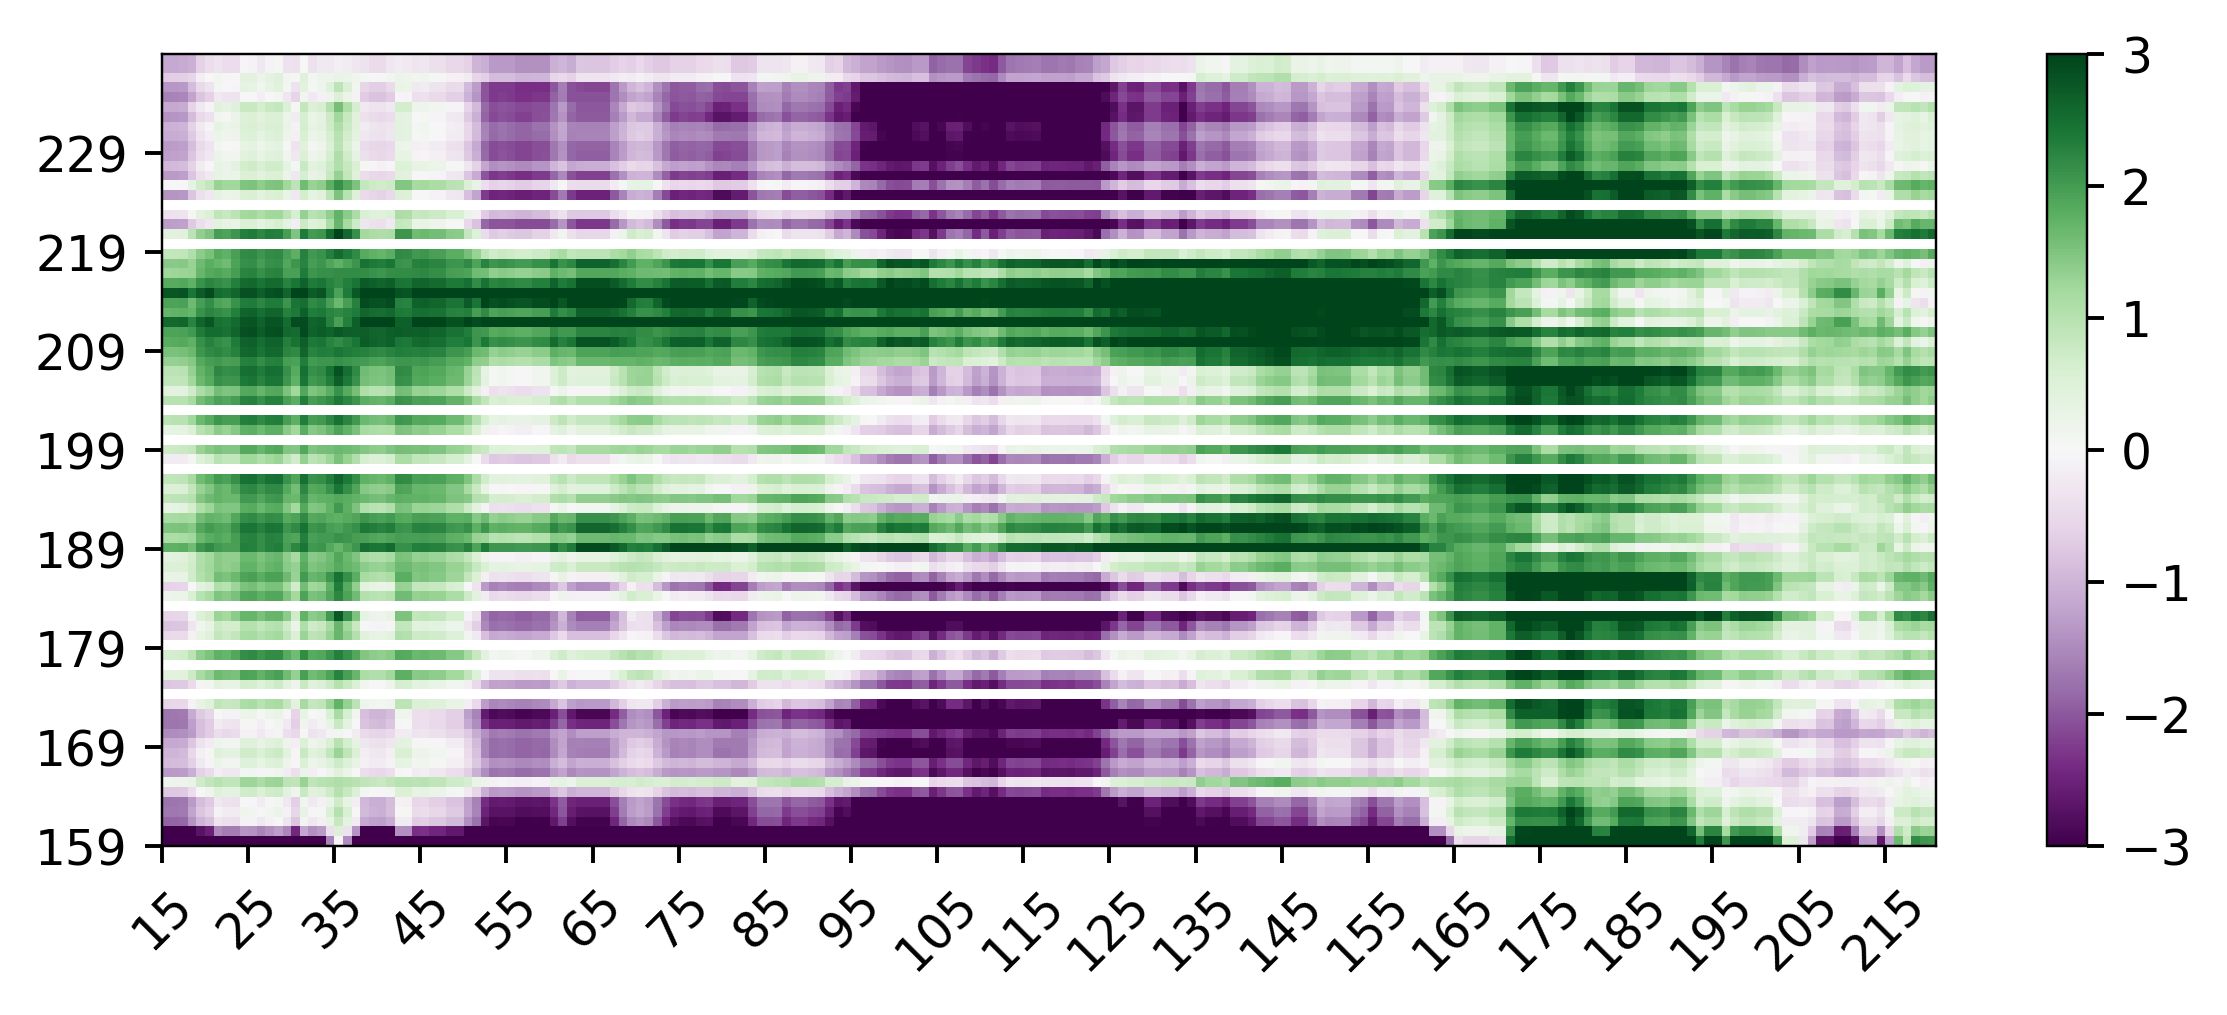

In [45]:

# set max and min range for interaction
vmax=3
vmin=-3
cmap='PRGn'
tic_frequency = 10

half_window = int((window_size-1)/2)
idr_start = half_window
idr_end = len(gcn4_ntd) - half_window

# start indices for folded domain
fd_start = 1
fd_end = 81

# this is the residue where the fd starts in its original protein
fd_offset = 158

figure(None, (7,3), dpi=350)


plt.imshow(X[1], extent=[idr_start, idr_end, fd_start, fd_end], origin='lower', aspect='auto', vmax=vmax, vmin=vmin, cmap=cmap)
ax=plt.gca()






ax.set_yticks(np.arange(fd_start, fd_end, tic_frequency), np.arange(fd_start+fd_offset, fd_end+fd_offset, tic_frequency))
ax.set_xticks(np.arange(idr_start, idr_end, tic_frequency))
ax.tick_params(axis='x', rotation=45)  # Rotates the x-tick labels by 45 degrees


plt.colorbar()
plt.tight_layout()